# seisanwavdb2web

Last update: Glenn Thompson 2021/07/09

We are working here from the WAV files in Seisan. 
We ideally need a process that checks for REA files that exist without corresponding WAV files too.

Plus we might want to build a version of this from an Antelope catalog.

st.select(): A new Stream object is returned but the traces it contains are just aliases to the traces of the original stream. Does not copy the data but only passes a reference. So I guess if you change a trace, it changes the same way in both streams! Dangerous! So think of Stream as just a container for Trace objects and each Stream can references same Traces.

Processing 2005-05-01-0149-37S.MVO___025. Reading. Success.
Processing 2005-05-01-0412-49S.MVO___025. Reading. Success.
Processing 2005-05-01-1304-07S.MVO___025. Reading. Success.
Have reached MAX_FILES_TO_PROCESS limit
Processing 2005-05-01-0149-37S.MVO___025.pickle
Creating  /Users/thompsong/DATA/MVO/HTML/MVOE_/2005/05/2005-05-01-0149-37S.MVO___025_sgram.png
Processing 2005-05-01-0412-49S.MVO___025.pickle
Creating  /Users/thompsong/DATA/MVO/HTML/MVOE_/2005/05/2005-05-01-0412-49S.MVO___025_sgram.png
Processing 2005-05-01-1304-07S.MVO___025.pickle
Creating  /Users/thompsong/DATA/MVO/HTML/MVOE_/2005/05/2005-05-01-1304-07S.MVO___025_sgram.png
Processing 2005-05-01-0149-37S.MVO___025.pickle
Processing 2005-05-01-0412-49S.MVO___025.pickle
Processing 2005-05-01-1304-07S.MVO___025.pickle
Processing 2005-05-01-0149-37S.MVO___025_sgram.png
Processing 2005-05-01-0412-49S.MVO___025_sgram.png
Processing 2005-05-01-1304-07S.MVO___025_sgram.png


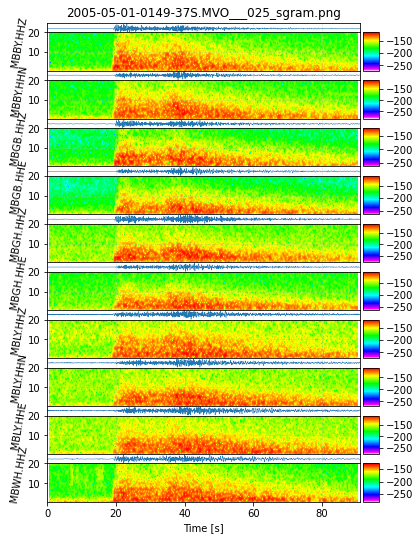

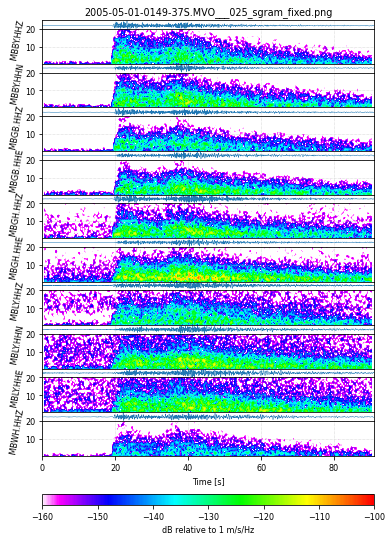

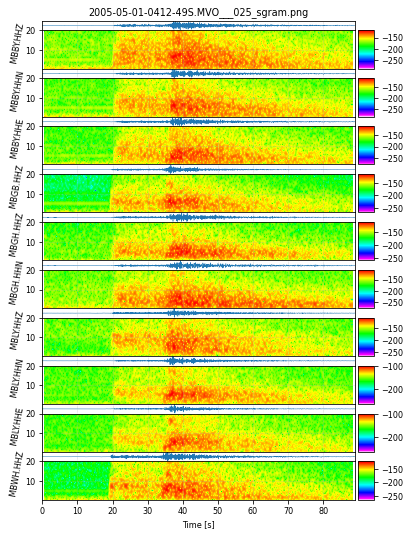

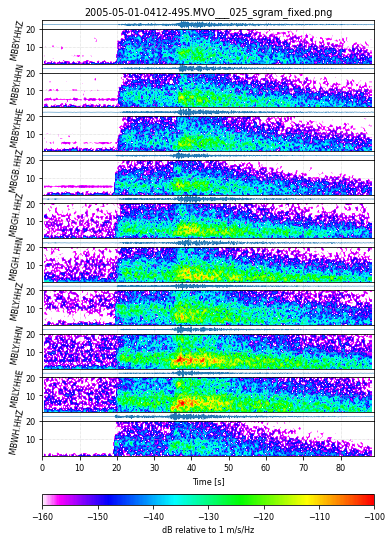

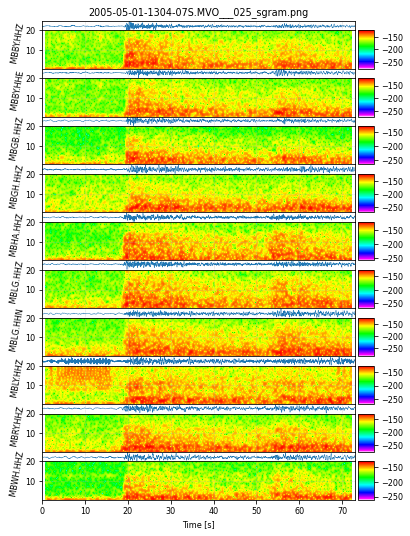

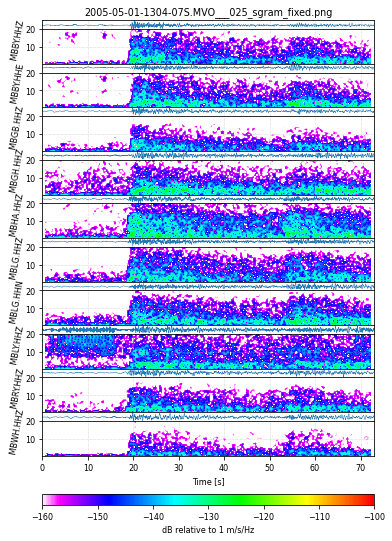

In [2]:
import os
import sys
import pandas as pd
from obspy import read
sys.path.append('/Users/thompsong/src/kitchensinkGT/LIB/seisanDBtools')
from seisanDBwrappers import create_event_picklefiles, create_event_spectrograms, pickle2csv, create_catalog_website, resp2stationxml

# Montserrat Seisan data processor, one month at a time
#SEISAN_DATA = os.getenv('SEISAN_DATA')
SEISAN_DATA = '%s/DATA/MVO' % os.getenv('HOME')
os.chdir(SEISAN_DATA)
DB = 'MVOE_'
YYYY = '2005'
MM = '05'
shortperiod = False
if DB[0:4]=='ASNE':
    shortperiod = True
MAXFILES = 3
badseisanfiles = create_event_picklefiles(SEISAN_DATA, DB, YYYY, MM, shortperiod, MAX_FILES_TO_PROCESS=MAXFILES)
create_event_spectrograms(SEISAN_DATA, DB, YYYY, MM)
pickle2csv(SEISAN_DATA, DB, YYYY, MM, MAX_FILES_TO_PROCESS=MAXFILES)
create_catalog_website(SEISAN_DATA, DB, YYYY, MM)

# CONVERT RESP FILES TO STATION XML

This part was written as a one-off to convert RESP files to Station XML files. 
I ended up writing a bunch of library functions to make this happen.

In [ ]:
import os,sys
sys.path.append('/Users/thompsong/src/kitchensinkGT/LIB/seisanDBtools')
from seisanDBwrappers import resp2stationxml
SEISAN_DATA = '%s/DATA/MVO' % os.getenv('HOME')
resp2stationxml(SEISAN_DATA)

After this I had to do things like:
    
    cat station.MN.MBWH*xml > station.MV.MBWH.xml
    
Then with vi, remove the parts between each channel section (normally had to remove either 9 or 18 lines between each)

Then we ended up with files like station.MV.STATION_CODE.xml

In [ ]:
from obspy import read_inventory
inv = read_inventory('/Users/thompsong/DATA/MVO/CAL/station.MV.MBWH.xml')
print(inv)

In [ ]:
st = read('/Users/thompsong/DATA/MVO/PICKLE/MVOE_/2005/05/2005-05-17-0428-28S.MVO___031.pickle')
for tr in st:
    print()
    print('id = ',tr.id)
    s = tr.stats
    for item in ['starttime', 'endtime', 'delta', 'duration', 'snr', 'quality_factor', 'peakamp', 'peaktime', 'energy']:
        print(item,' :', s[item])
    sp = s.spectrum
    for item in ['peakF', 'peakA', 'medianF', 'bw_min', 'bw_max']:
        print(item,' :', sp[item])
    m = s.metrics
    for item in ['start_gap', 'num_gaps', 'end_gap', 'sum_gaps', 'max_gap', 'num_overlaps', 'sum_overlaps', 'num_records', 'record_length', 'sample_min', 'sample_max', 'sample_mean', 'sample_median', 'sample_lower_quartile', 'sample_upper_quartile', 'sample_rms', 'sample_stdev', 'percent_availability']:
        print(item,' :', m[item])
    sci = s.scipy
    for item in ['skewness', 'kurtosis']:
        print(item,' :', sci[item])
    

In [ ]:
import numpy as np
a = np.arange(10)
print(a[-5:])